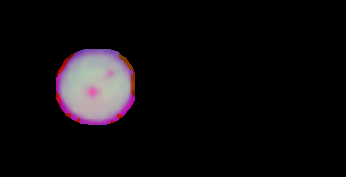

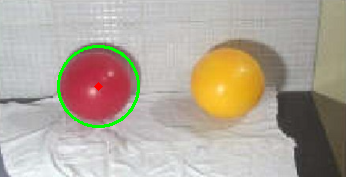

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow as cv_imshow

img = cv.imread('Bola 1.png')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

mask = cv.inRange(hsv, (168,120,120), (179,255,255))
kernel = np.ones((3, 3), np.uint8)
mask = cv.dilate(mask, kernel, iterations=5)
redImg = cv.bitwise_and(hsv, hsv, mask=mask)

redImg = cv.medianBlur(redImg, 5)
cv_imshow(redImg)
redImg = redImg[:,:,2]

circles = cv.HoughCircles(redImg, cv.HOUGH_GRADIENT, 1.2, 180, param1=50, param2=50, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(img,(i[0], i[1]), i[2], (0,255,0) ,2)
    cv.circle(img,(i[0], i[1]), 2, (0,0,255) ,3)

cv_imshow(img)

